In [12]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [13]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [14]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [15]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [17]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [18]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Badt, Mr. Mohamed",male,1601,B96 B98,S
freq,1,577,7,4,644


In [20]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [21]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [22]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [23]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


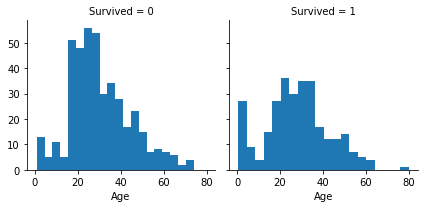

In [24]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

E:\anacona\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


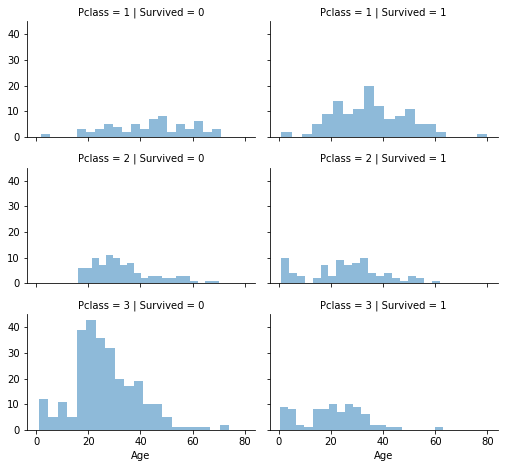

In [25]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

E:\anacona\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
E:\anacona\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


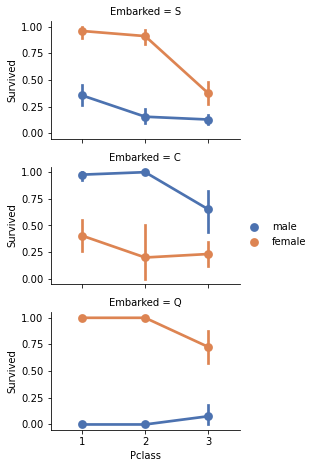

In [26]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()


E:\anacona\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
E:\anacona\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


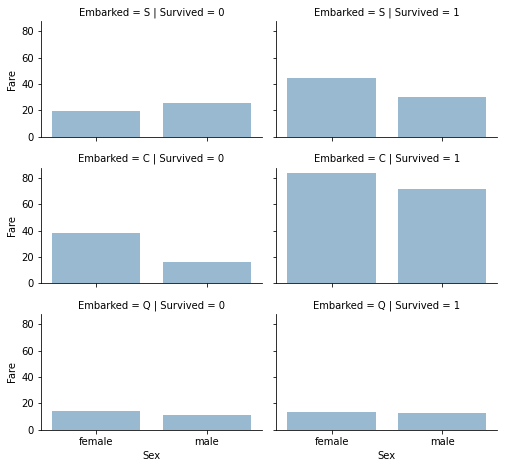

In [27]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [28]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [29]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [30]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [31]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [32]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [33]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


E:\anacona\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


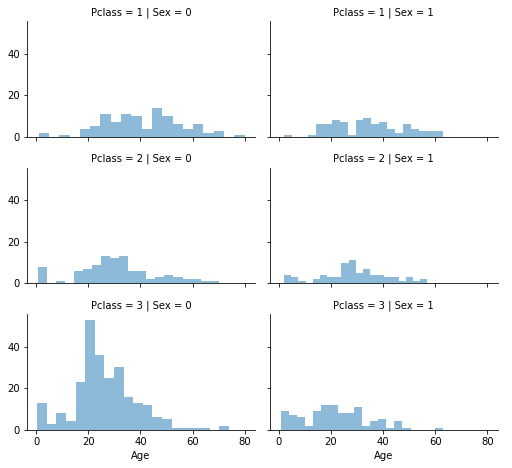

In [34]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [35]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [36]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [37]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [38]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [39]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [40]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [41]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [42]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [43]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [44]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [45]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [46]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [47]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [48]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [49]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [50]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


# Model, predict and solve

In [51]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

# Logistic Regression

In [52]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.36

In [53]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201619
5,Title,0.397888
2,Age,0.287011
4,Embarked,0.261473
6,IsAlone,0.126553
3,Fare,-0.086655
7,Age*Class,-0.311069
0,Pclass,-0.750700


# Support Vector Machines

In [54]:

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

78.23

# KNN

In [55]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.74

# Gaussian Naive Bayes

In [56]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

# Stochastic Gradient Descent

In [57]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

79.46

# Decision Tree

In [58]:

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

# Random Forest

In [59]:

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

In [60]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian,
              acc_sgd, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
6,Decision Tree,86.76
1,KNN,84.74
2,Logistic Regression,80.36
5,Stochastic Gradient Decent,79.46
0,Support Vector Machines,78.23
4,Naive Bayes,72.28


In [61]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })

# LOGESTIC REGRESSION

In [62]:
from sklearn.linear_model import LogisticRegression
glm = LogisticRegression()

In [63]:
model = glm.fit(X_train,Y_train)

In [64]:
predicted= model.predict(X_test)

In [65]:
Y_test = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })

In [66]:
Y_test

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [67]:
Y_test = Y_test.drop(["PassengerId"],axis=1)

In [68]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,predicted))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       253
           1       0.83      0.75      0.79       165

    accuracy                           0.84       418
   macro avg       0.84      0.83      0.83       418
weighted avg       0.84      0.84      0.84       418



In [69]:
from sklearn import metrics

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
import numpy as np
from sklearn.metrics import roc_auc_score,roc_curve

In [72]:
# Function For Logistic Regression Create Summary For Logistic Regression

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle=':')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def get_summary(Y_test,predicted):
    # Confusion Matrix
    confusion = confusion_matrix(Y_test,predicted)
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    TP = confusion[1, 1]
    
    
    accuracy = (TP+TN)/((FN+FP)+(TP+TN))
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall =  TP / (TP + FN)
    fScore = (2 * recall * precision) / (recall + precision)
    auc = roc_auc_score(Y_test, predicted)

    print("Confusion Matrix:\n",confusion)
    print("Accuracy:",accuracy)
    print("Sensitivity :",sensitivity)
    print("Specificity :",specificity)
    print("Precision:",precision)
    print("Recall:",recall)
    print("F-score:",fScore)
    print("AUC:",auc)
    print("ROC curve:")
    fpr, tpr, thresholds = roc_curve(Y_test, predicted)
    plot_roc_curve(fpr, tpr)

Confusion Matrix:
 [[228  25]
 [ 41 124]]
Accuracy: 0.8421052631578947
Sensitivity : 0.7515151515151515
Specificity : 0.9011857707509882
Precision: 0.8322147651006712
Recall: 0.7515151515151515
F-score: 0.789808917197452
AUC: 0.8263504611330698
ROC curve:


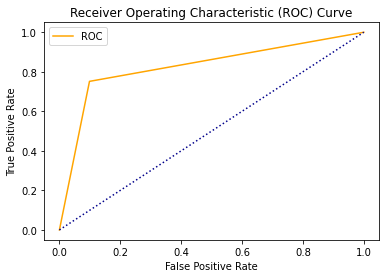

In [73]:
get_summary(Y_test,predicted)

# Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
dtree = DecisionTreeClassifier()

In [76]:
dtree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [77]:
predictions = dtree.predict(X_test)

In [78]:
from sklearn.metrics import classification_report,confusion_matrix

In [79]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       253
           1       0.97      0.87      0.92       165

    accuracy                           0.94       418
   macro avg       0.95      0.93      0.93       418
weighted avg       0.94      0.94      0.94       418



In [80]:
print(confusion_matrix(Y_test,predictions))

[[249   4]
 [ 22 143]]


In [81]:
# Function For Logistic Regression Create Summary For Logistic Regression

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle=':')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def get_summary(Y_test,predictions):
    # Confusion Matrix
    confusion = confusion_matrix(Y_test,predictions)
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    TP = confusion[1, 1]
    
    
    accuracy = (TP+TN)/((FN+FP)+(TP+TN))
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall =  TP / (TP + FN)
    fScore = (2 * recall * precision) / (recall + precision)
    auc = roc_auc_score(Y_test,predictions)

    print("Confusion Matrix:\n",confusion)
    print("Accuracy:",accuracy)
    print("Sensitivity :",sensitivity)
    print("Specificity :",specificity)
    print("Precision:",precision)
    print("Recall:",recall)
    print("F-score:",fScore)
    print("AUC:",auc)
    print("ROC curve:")
    fpr, tpr, thresholds = roc_curve(Y_test,predictions)
    plot_roc_curve(fpr, tpr)

Confusion Matrix:
 [[249   4]
 [ 22 143]]
Accuracy: 0.937799043062201
Sensitivity : 0.8666666666666667
Specificity : 0.9841897233201581
Precision: 0.9727891156462585
Recall: 0.8666666666666667
F-score: 0.9166666666666667
AUC: 0.9254281949934124
ROC curve:


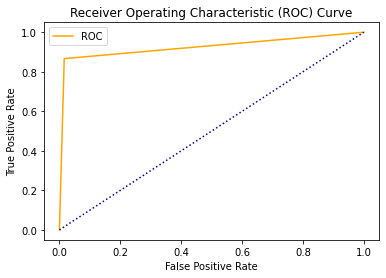

In [82]:
get_summary(Y_test,predictions)

# Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [84]:
rfc_pred = rfc.predict(X_test)

In [85]:
print(confusion_matrix(Y_test,rfc_pred))

[[252   1]
 [  9 156]]


In [86]:
print(classification_report(Y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       253
           1       0.99      0.95      0.97       165

    accuracy                           0.98       418
   macro avg       0.98      0.97      0.97       418
weighted avg       0.98      0.98      0.98       418



In [87]:
# Function For Logistic Regression Create Summary For Logistic Regression

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle=':')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def get_summary(Y_test,rfc_pred):
    # Confusion Matrix
    confusion = confusion_matrix(Y_test,rfc_pred)
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    TP = confusion[1, 1]
    
    
    accuracy = (TP+TN)/((FN+FP)+(TP+TN))
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall =  TP / (TP + FN)
    fScore = (2 * recall * precision) / (recall + precision)
    auc = roc_auc_score(Y_test,rfc_pred)

    print("Confusion Matrix:\n",confusion)
    print("Accuracy:",accuracy)
    print("Sensitivity :",sensitivity)
    print("Specificity :",specificity)
    print("Precision:",precision)
    print("Recall:",recall)
    print("F-score:",fScore)
    print("AUC:",auc)
    print("ROC curve:")
    fpr, tpr, thresholds = roc_curve(Y_test,rfc_pred)
    plot_roc_curve(fpr, tpr)

Confusion Matrix:
 [[252   1]
 [  9 156]]
Accuracy: 0.9760765550239234
Sensitivity : 0.9454545454545454
Specificity : 0.9960474308300395
Precision: 0.9936305732484076
Recall: 0.9454545454545454
F-score: 0.9689440993788819
AUC: 0.9707509881422925
ROC curve:


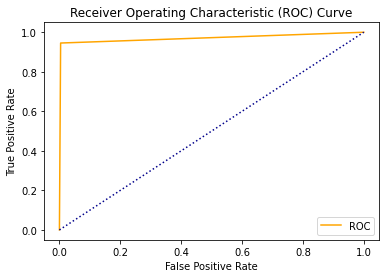

In [88]:
get_summary(Y_test,rfc_pred)

# KNN

In [89]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier

In [90]:
from sklearn import metrics
for i in range(1,40,2):
    classifier = KNeighborsClassifier(n_neighbors=i)
#Train the model using the training sets
    classifier.fit(X_train, Y_train)
#Predict the response for test dataset
    pred = classifier.predict(X_test)
    Accuracy = []  
    print("Accuracy:",metrics.accuracy_score(Y_test,pred), "for",i)

Accuracy: 0.8923444976076556 for 1
Accuracy: 0.9354066985645934 for 3
Accuracy: 0.8971291866028708 for 5
Accuracy: 0.8995215311004785 for 7
Accuracy: 0.9138755980861244 for 9
Accuracy: 0.9090909090909091 for 11
Accuracy: 0.9019138755980861 for 13
Accuracy: 0.8995215311004785 for 15
Accuracy: 0.8995215311004785 for 17
Accuracy: 0.9043062200956937 for 19
Accuracy: 0.9043062200956937 for 21
Accuracy: 0.8947368421052632 for 23
Accuracy: 0.8899521531100478 for 25
Accuracy: 0.8899521531100478 for 27
Accuracy: 0.868421052631579 for 29
Accuracy: 0.861244019138756 for 31
Accuracy: 0.8564593301435407 for 33
Accuracy: 0.8181818181818182 for 35
Accuracy: 0.8133971291866029 for 37
Accuracy: 0.8086124401913876 for 39


In [91]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [92]:
print(confusion_matrix(Y_test,pred))

[[236  17]
 [ 63 102]]


In [93]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86       253
           1       0.86      0.62      0.72       165

    accuracy                           0.81       418
   macro avg       0.82      0.78      0.79       418
weighted avg       0.82      0.81      0.80       418



In [94]:
# Function For Logistic Regression Create Summary For Logistic Regression

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle=':')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def get_summary(Y_test,pred):
    # Confusion Matrix
    confusion = confusion_matrix(Y_test,pred)
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    TP = confusion[1, 1]
    
    
    accuracy = (TP+TN)/((FN+FP)+(TP+TN))
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall =  TP / (TP + FN)
    fScore = (2 * recall * precision) / (recall + precision)
    auc = roc_auc_score(Y_test,pred)

    print("Confusion Matrix:\n",confusion)
    print("Accuracy:",accuracy)
    print("Sensitivity :",sensitivity)
    print("Specificity :",specificity)
    print("Precision:",precision)
    print("Recall:",recall)
    print("F-score:",fScore)
    print("AUC:",auc)
    print("ROC curve:")
    fpr, tpr, thresholds = roc_curve(Y_test,pred)
    plot_roc_curve(fpr, tpr)

Confusion Matrix:
 [[236  17]
 [ 63 102]]
Accuracy: 0.8086124401913876
Sensitivity : 0.6181818181818182
Specificity : 0.932806324110672
Precision: 0.8571428571428571
Recall: 0.6181818181818182
F-score: 0.7183098591549295
AUC: 0.775494071146245
ROC curve:


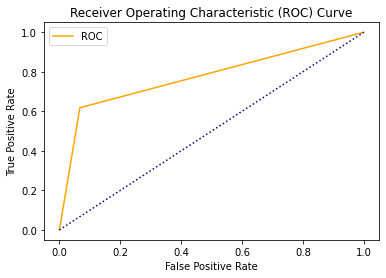

In [95]:
get_summary(Y_test,pred)

# SVM

In [96]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, Y_train)

#Predict the response for test dataset
pred = clf.predict(X_test)

In [97]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [98]:
print(confusion_matrix(Y_test,pred))

[[223  30]
 [ 43 122]]


In [99]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       253
           1       0.80      0.74      0.77       165

    accuracy                           0.83       418
   macro avg       0.82      0.81      0.81       418
weighted avg       0.82      0.83      0.82       418



In [100]:
# Function For Logistic Regression Create Summary For Logistic Regression

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle=':')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def get_summary(Y_test,pred):
    # Confusion Matrix
    confusion = confusion_matrix(Y_test,pred)
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    TP = confusion[1, 1]
    
    
    accuracy = (TP+TN)/((FN+FP)+(TP+TN))
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall =  TP / (TP + FN)
    fScore = (2 * recall * precision) / (recall + precision)
    auc = roc_auc_score(Y_test,pred)

    print("Confusion Matrix:\n",confusion)
    print("Accuracy:",accuracy)
    print("Sensitivity :",sensitivity)
    print("Specificity :",specificity)
    print("Precision:",precision)
    print("Recall:",recall)
    print("F-score:",fScore)
    print("AUC:",auc)
    print("ROC curve:")
    fpr, tpr, thresholds = roc_curve(Y_test,pred)
    plot_roc_curve(fpr, tpr)

Confusion Matrix:
 [[223  30]
 [ 43 122]]
Accuracy: 0.8253588516746412
Sensitivity : 0.7393939393939394
Specificity : 0.8814229249011858
Precision: 0.8026315789473685
Recall: 0.7393939393939394
F-score: 0.7697160883280758
AUC: 0.8104084321475625
ROC curve:


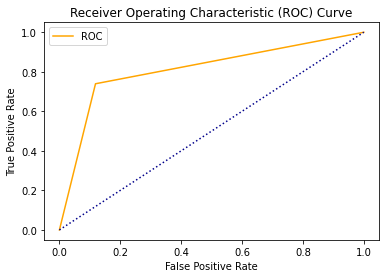

In [101]:
get_summary(Y_test,pred)

# Bagging

In [102]:
from sklearn import model_selection 
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier 

In [103]:
dtc = DecisionTreeClassifier(criterion="entropy")
bag_model=BaggingClassifier(base_estimator=dtc, n_estimators=100, bootstrap=True)


In [104]:
bag_model=bag_model.fit(X_train,Y_train)
Y_test_pred=bag_model.predict(X_test)
print(bag_model.score(X_test, Y_test))
print(confusion_matrix(Y_test, Y_test_pred)) 

0.9449760765550239
[[248   5]
 [ 18 147]]


In [105]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [106]:
print(classification_report(Y_test,Y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       253
           1       0.97      0.89      0.93       165

    accuracy                           0.94       418
   macro avg       0.95      0.94      0.94       418
weighted avg       0.95      0.94      0.94       418



In [107]:
# Function For Logistic Regression Create Summary For Logistic Regression

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle=':')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def get_summary(Y_test,Y_test_pred):
    # Confusion Matrix
    confusion = confusion_matrix(Y_test,Y_test_pred)
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    TP = confusion[1, 1]
    
    
    accuracy = (TP+TN)/((FN+FP)+(TP+TN))
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall =  TP / (TP + FN)
    fScore = (2 * recall * precision) / (recall + precision)
    auc = roc_auc_score(Y_test,Y_test_pred)

    print("Confusion Matrix:\n",confusion)
    print("Accuracy:",accuracy)
    print("Sensitivity :",sensitivity)
    print("Specificity :",specificity)
    print("Precision:",precision)
    print("Recall:",recall)
    print("F-score:",fScore)
    print("AUC:",auc)
    print("ROC curve:")
    fpr, tpr, thresholds = roc_curve(Y_test,Y_test_pred)
    plot_roc_curve(fpr, tpr)

Confusion Matrix:
 [[248   5]
 [ 18 147]]
Accuracy: 0.9449760765550239
Sensitivity : 0.8909090909090909
Specificity : 0.9802371541501976
Precision: 0.9671052631578947
Recall: 0.8909090909090909
F-score: 0.9274447949526813
AUC: 0.9355731225296443
ROC curve:


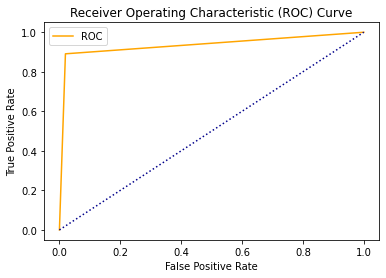

In [108]:
get_summary(Y_test,Y_test_pred)

# Navie Bayes

In [109]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [110]:
model = GaussianNB()

In [111]:
model = model.fit(X_train,Y_train)

In [112]:
Y_test_pred = model.predict(X_test)

In [113]:
print(model.score(X_test, Y_test))
print(confusion_matrix(Y_test, Y_test_pred))

0.784688995215311
[[169  84]
 [  6 159]]


In [114]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [115]:
print(classification_report(Y_test,Y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.67      0.79       253
           1       0.65      0.96      0.78       165

    accuracy                           0.78       418
   macro avg       0.81      0.82      0.78       418
weighted avg       0.84      0.78      0.79       418



In [116]:
# Function For Logistic Regression Create Summary For Logistic Regression

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle=':')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def get_summary(Y_test,Y_test_pred):
    # Confusion Matrix
    confusion = confusion_matrix(Y_test,Y_test_pred)
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    TP = confusion[1, 1]
    
    
    accuracy = (TP+TN)/((FN+FP)+(TP+TN))
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall =  TP / (TP + FN)
    fScore = (2 * recall * precision) / (recall + precision)
    auc = roc_auc_score(Y_test,Y_test_pred)

    print("Confusion Matrix:\n",confusion)
    print("Accuracy:",accuracy)
    print("Sensitivity :",sensitivity)
    print("Specificity :",specificity)
    print("Precision:",precision)
    print("Recall:",recall)
    print("F-score:",fScore)
    print("AUC:",auc)
    print("ROC curve:")
    fpr, tpr, thresholds = roc_curve(Y_test,Y_test_pred)
    plot_roc_curve(fpr, tpr)

Confusion Matrix:
 [[169  84]
 [  6 159]]
Accuracy: 0.784688995215311
Sensitivity : 0.9636363636363636
Specificity : 0.6679841897233202
Precision: 0.654320987654321
Recall: 0.9636363636363636
F-score: 0.7794117647058824
AUC: 0.8158102766798419
ROC curve:


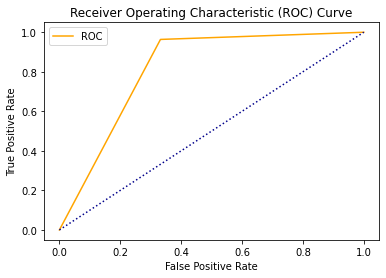

In [117]:
get_summary(Y_test,Y_test_pred)

# Neural Network

In [118]:
import sklearn as sk
from sklearn.neural_network import MLPClassifier

NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 9), random_state=1).fit(X_train, Y_train)
Y_test_pred=NN.predict(X_test)
round(NN.score(X_test, Y_test), 4)

E:\anacona\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9354

In [119]:
print(model.score(X_test, Y_test))
print(confusion_matrix(Y_test, Y_test_pred))

0.784688995215311
[[248   5]
 [ 22 143]]


In [120]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [121]:
print(classification_report(Y_test,Y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       253
           1       0.97      0.87      0.91       165

    accuracy                           0.94       418
   macro avg       0.94      0.92      0.93       418
weighted avg       0.94      0.94      0.93       418



In [122]:
# Function For Logistic Regression Create Summary For Logistic Regression

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle=':')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def get_summary(Y_test,Y_test_pred):
    # Confusion Matrix
    confusion = confusion_matrix(Y_test,Y_test_pred)
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    TP = confusion[1, 1]
    
    
    accuracy = (TP+TN)/((FN+FP)+(TP+TN))
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall =  TP / (TP + FN)
    fScore = (2 * recall * precision) / (recall + precision)
    auc = roc_auc_score(Y_test,Y_test_pred)

    print("Confusion Matrix:\n",confusion)
    print("Accuracy:",accuracy)
    print("Sensitivity :",sensitivity)
    print("Specificity :",specificity)
    print("Precision:",precision)
    print("Recall:",recall)
    print("F-score:",fScore)
    print("AUC:",auc)
    print("ROC curve:")
    fpr, tpr, thresholds = roc_curve(Y_test,Y_test_pred)
    plot_roc_curve(fpr, tpr)

Confusion Matrix:
 [[248   5]
 [ 22 143]]
Accuracy: 0.9354066985645934
Sensitivity : 0.8666666666666667
Specificity : 0.9802371541501976
Precision: 0.9662162162162162
Recall: 0.8666666666666667
F-score: 0.9137380191693291
AUC: 0.9234519104084321
ROC curve:


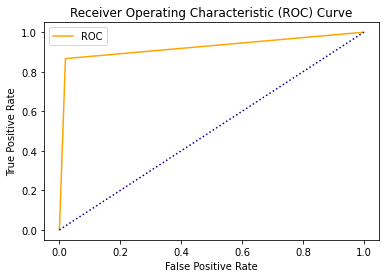

In [123]:
get_summary(Y_test,Y_test_pred)

# Adaptive Boosting

In [124]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [125]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200)

In [126]:
adafit =ada.fit(X_train,Y_train)

In [127]:
adafit

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)

In [128]:
Y_predADA = ada.predict(X_test)

In [129]:
len(Y_predADA)

418

In [130]:
Y_predADA

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [131]:
print(confusion_matrix(Y_test, Y_predADA))

[[228  25]
 [ 26 139]]


In [132]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [133]:
print(classification_report(Y_test,Y_predADA))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       253
           1       0.85      0.84      0.84       165

    accuracy                           0.88       418
   macro avg       0.87      0.87      0.87       418
weighted avg       0.88      0.88      0.88       418



In [134]:
# Function For Logistic Regression Create Summary For Logistic Regression

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle=':')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def get_summary(Y_test,Y_predADA):
    # Confusion Matrix
    confusion = confusion_matrix(Y_test,Y_predADA)
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    TP = confusion[1, 1]
    
    
    accuracy = (TP+TN)/((FN+FP)+(TP+TN))
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall =  TP / (TP + FN)
    fScore = (2 * recall * precision) / (recall + precision)
    auc = roc_auc_score(Y_test,Y_predADA)

    print("Confusion Matrix:\n",confusion)
    print("Accuracy:",accuracy)
    print("Sensitivity :",sensitivity)
    print("Specificity :",specificity)
    print("Precision:",precision)
    print("Recall:",recall)
    print("F-score:",fScore)
    print("AUC:",auc)
    print("ROC curve:")
    fpr, tpr, thresholds = roc_curve(Y_test,Y_predADA)
    plot_roc_curve(fpr, tpr)

Confusion Matrix:
 [[248   5]
 [ 22 143]]
Accuracy: 0.9354066985645934
Sensitivity : 0.8666666666666667
Specificity : 0.9802371541501976
Precision: 0.9662162162162162
Recall: 0.8666666666666667
F-score: 0.9137380191693291
AUC: 0.9234519104084321
ROC curve:


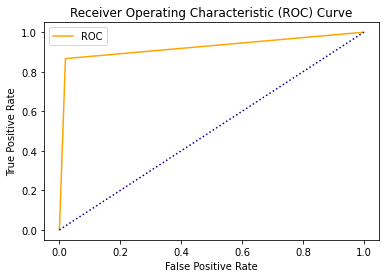

In [135]:
get_summary(Y_test,Y_test_pred)

# XGBoosting

In [136]:
from xgboost import XGBClassifier

In [137]:
# fit model on training data
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

In [138]:
# fit model on training data
XGB = XGBClassifier(params = params)

In [139]:
XGB.fit(X_train,Y_train)

[00:08:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [140]:
Y_predXGB = XGB.predict(X_test)

In [141]:
Y_predXGB

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [142]:
print(confusion_matrix(Y_test, Y_predXGB))

[[249   4]
 [ 12 153]]


In [143]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [144]:
print(classification_report(Y_test,Y_predXGB))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       253
           1       0.97      0.93      0.95       165

    accuracy                           0.96       418
   macro avg       0.96      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418



In [145]:
# Function For Logistic Regression Create Summary For Logistic Regression

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle=':')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def get_summary(Y_test,Y_predXGB):
    # Confusion Matrix
    confusion = confusion_matrix(Y_test,Y_predXGB)
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    TP = confusion[1, 1]
    
    
    accuracy = (TP+TN)/((FN+FP)+(TP+TN))
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall =  TP / (TP + FN)
    fScore = (2 * recall * precision) / (recall + precision)
    auc = roc_auc_score(Y_test,Y_predXGB)

    print("Confusion Matrix:\n",confusion)
    print("Accuracy:",accuracy)
    print("Sensitivity :",sensitivity)
    print("Specificity :",specificity)
    print("Precision:",precision)
    print("Recall:",recall)
    print("F-score:",fScore)
    print("AUC:",auc)
    print("ROC curve:")
    fpr, tpr, thresholds = roc_curve(Y_test,Y_predXGB)
    plot_roc_curve(fpr, tpr)

Confusion Matrix:
 [[249   4]
 [ 12 153]]
Accuracy: 0.9617224880382775
Sensitivity : 0.9272727272727272
Specificity : 0.9841897233201581
Precision: 0.9745222929936306
Recall: 0.9272727272727272
F-score: 0.9503105590062112
AUC: 0.9557312252964426
ROC curve:


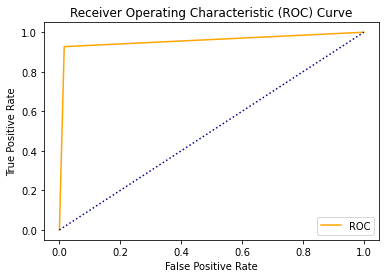

In [146]:
get_summary(Y_test,Y_predXGB)

# GradientBoosting

In [147]:
from sklearn.ensemble import GradientBoostingClassifier

In [148]:
# adaboost with the tree as base estimator
GBC = GradientBoostingClassifier(max_depth=2, n_estimators=200)

In [149]:
GBCfit =GBC.fit(X_train,Y_train)

In [150]:
Y_predGBC = GBC.predict(X_test)

In [151]:
print(confusion_matrix(Y_test, Y_predGBC))

[[247   6]
 [ 29 136]]


In [152]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [153]:
print(classification_report(Y_test,Y_predGBC))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       253
           1       0.96      0.82      0.89       165

    accuracy                           0.92       418
   macro avg       0.93      0.90      0.91       418
weighted avg       0.92      0.92      0.91       418



In [154]:
# Function For Logistic Regression Create Summary For Logistic Regression

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle=':')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def get_summary(Y_test,Y_predGBC):
    # Confusion Matrix
    confusion = confusion_matrix(Y_test,Y_predGBC)
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    TP = confusion[1, 1]
    
    
    accuracy = (TP+TN)/((FN+FP)+(TP+TN))
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall =  TP / (TP + FN)
    fScore = (2 * recall * precision) / (recall + precision)
    auc = roc_auc_score(Y_test,Y_predGBC)

    print("Confusion Matrix:\n",confusion)
    print("Accuracy:",accuracy)
    print("Sensitivity :",sensitivity)
    print("Specificity :",specificity)
    print("Precision:",precision)
    print("Recall:",recall)
    print("F-score:",fScore)
    print("AUC:",auc)
    print("ROC curve:")
    fpr, tpr, thresholds = roc_curve(Y_test,Y_predGBC)
    plot_roc_curve(fpr, tpr)

Confusion Matrix:
 [[247   6]
 [ 29 136]]
Accuracy: 0.916267942583732
Sensitivity : 0.8242424242424242
Specificity : 0.9762845849802372
Precision: 0.9577464788732394
Recall: 0.8242424242424242
F-score: 0.8859934853420195
AUC: 0.9002635046113308
ROC curve:


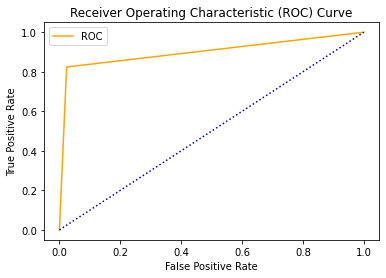

In [155]:
get_summary(Y_test,Y_predGBC)

# Lightgbm

In [156]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [157]:
import lightgbm

In [158]:
from lightgbm import LGBMClassifier

In [159]:
model = LGBMClassifier()

In [160]:
model.fit(X_train,Y_train)

LGBMClassifier()

In [161]:
Y_predLGBM = model.predict(X_test)

In [162]:
print(confusion_matrix(Y_test, Y_predLGBM))

[[245   8]
 [ 18 147]]


In [163]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [164]:
print(classification_report(Y_test,Y_predLGBM))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       253
           1       0.95      0.89      0.92       165

    accuracy                           0.94       418
   macro avg       0.94      0.93      0.93       418
weighted avg       0.94      0.94      0.94       418



In [165]:
# Function For Logistic Regression Create Summary For Logistic Regression

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle=':')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def get_summary(Y_test,Y_predLGBM):
    # Confusion Matrix
    confusion = confusion_matrix(Y_test,Y_predLGBM)
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    TP = confusion[1, 1]
    
    
    accuracy = (TP+TN)/((FN+FP)+(TP+TN))
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall =  TP / (TP + FN)
    fScore = (2 * recall * precision) / (recall + precision)
    auc = roc_auc_score(Y_test,Y_predLGBM)

    print("Confusion Matrix:\n",confusion)
    print("Accuracy:",accuracy)
    print("Sensitivity :",sensitivity)
    print("Specificity :",specificity)
    print("Precision:",precision)
    print("Recall:",recall)
    print("F-score:",fScore)
    print("AUC:",auc)
    print("ROC curve:")
    fpr, tpr, thresholds = roc_curve(Y_test,Y_predLGBM)
    plot_roc_curve(fpr, tpr)

Confusion Matrix:
 [[245   8]
 [ 18 147]]
Accuracy: 0.937799043062201
Sensitivity : 0.8909090909090909
Specificity : 0.9683794466403162
Precision: 0.9483870967741935
Recall: 0.8909090909090909
F-score: 0.9187499999999998
AUC: 0.9296442687747035
ROC curve:


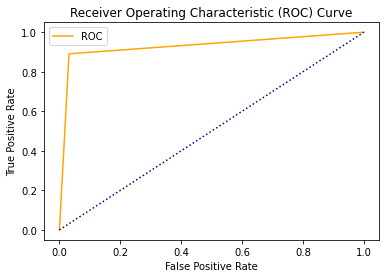

In [166]:
get_summary(Y_test,Y_predLGBM)

# CatBoost

In [168]:
pip install catboost

In [169]:
from catboost import CatBoostClassifier

In [170]:
model = CatBoostClassifier(iterations=2,
                           learning_rate=1,
                           depth=2)

In [171]:
model.fit(X_train,Y_train)

0:	learn: 0.4720847	total: 69.5ms	remaining: 69.5ms
1:	learn: 0.4510372	total: 70.7ms	remaining: 0us


In [172]:
Y_predCATB = model.predict(X_test)

In [173]:
print(confusion_matrix(Y_test, Y_predCATB))

[[220  33]
 [ 37 128]]


In [174]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [175]:
print(classification_report(Y_test,Y_predCATB))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       253
           1       0.80      0.78      0.79       165

    accuracy                           0.83       418
   macro avg       0.83      0.82      0.82       418
weighted avg       0.83      0.83      0.83       418



In [176]:
# Function For Logistic Regression Create Summary For Logistic Regression

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle=':')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def get_summary(Y_test,Y_predCATB):
    # Confusion Matrix
    confusion = confusion_matrix(Y_test,Y_predCATB)
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    TP = confusion[1, 1]
    
    
    accuracy = (TP+TN)/((FN+FP)+(TP+TN))
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall =  TP / (TP + FN)
    fScore = (2 * recall * precision) / (recall + precision)
    auc = roc_auc_score(Y_test,Y_predCATB)

    print("Confusion Matrix:\n",confusion)
    print("Accuracy:",accuracy)
    print("Sensitivity :",sensitivity)
    print("Specificity :",specificity)
    print("Precision:",precision)
    print("Recall:",recall)
    print("F-score:",fScore)
    print("AUC:",auc)
    print("ROC curve:")
    fpr, tpr, thresholds = roc_curve(Y_test,Y_predCATB)
    plot_roc_curve(fpr, tpr)

Confusion Matrix:
 [[220  33]
 [ 37 128]]
Accuracy: 0.8325358851674641
Sensitivity : 0.7757575757575758
Specificity : 0.8695652173913043
Precision: 0.7950310559006211
Recall: 0.7757575757575758
F-score: 0.7852760736196319
AUC: 0.8226613965744402
ROC curve:


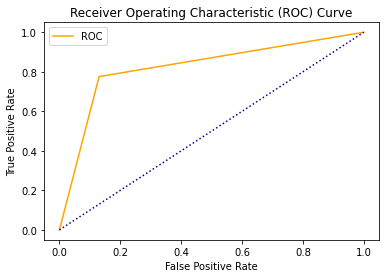

In [177]:
get_summary(Y_test,Y_predCATB)